In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

from functools import reduce
from dotenv import load_dotenv
import plotly.graph_objects as go

import gmplot

In [4]:
district = ['CUAUHTEMOC',
            'IZTAPALAPA',
            'GUSTAVO A MADERO',
            'BENITO JUAREZ',
            'MIGUEL HIDALGO',
            'COYOACAN',
            'ALVARO OBREGON',
            'VENUSTIANO CARRANZA',
            'TLALPAN',
            'AZCAPOTZALCO',
            'IZTACALCO',
            'XOCHIMILCO',
            'TLAHUAC',
            'LA MAGDALENA CONTRERAS',
            'CUAJIMALPA DE MORELOS',
            'MILPA ALTA',
            'PUEBLA',
            'SIN DATO',
            'ECATEPEC DE MORELOS',
            'NAUCALPAN DE JUAREZ',
            'TLALNEPANTLA DE BAZ',
            'TLAXCALA',
            'ATIZAPAN DE ZARAGOZA',
            'CELAYA',
            'CHIMALHUACAN',
            'CORDOBA',
            'GUADALUPE',
            'GUANAJUATO',
            'LA PAZ',
            'LAFRAGUA',
            'MONTERREY',
            'PACHUCA DE SOTO',
            'QUERETARO',
            'SAN BARTOLO COYOTEPEC',
            'TEHUACAN',
            'TEQUISQUIAPAN',
            'TULTITLAN']

In [5]:
month = ['Abril',
         'Agosto',
         'Diciembre',
         'Enero',
         'Febrero',
         'Julio',
         'Junio',
         'Marzo',
         'Mayo',
         'Noviembre',
         'Octubre',
         'Septiembre']

In [6]:
year = [2016, 2017, 2018]

In [30]:
links = []
for y in year:
    for m in month:
        for d in district:
            links.append("https://datos.cdmx.gob.mx/api/records/1.0/search/?dataset=carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico&rows=10000&facet=ao_hechos&facet=mes_hechos&facet=delito&facet=categoria_delito&facet=fiscalia&facet=alcaldia_hechos&facet=colonia_hechos&facet=ao_inicio&refine.ao_hechos={}&refine.mes_hechos={}&refine.alcaldia_hechos={}".format(y, m, d))

In [31]:
resps = []
i = 0
for link in links:
    try:
        resps.append(requests.get(link).json())
    except:
        pass
    i += 1
    if i%100 == 0:
        print("{} links out of {} completed".format(i, len(links)))

100 links out of 1332 completed
200 links out of 1332 completed
300 links out of 1332 completed
400 links out of 1332 completed
500 links out of 1332 completed
600 links out of 1332 completed
700 links out of 1332 completed
800 links out of 1332 completed
900 links out of 1332 completed
1000 links out of 1332 completed
1100 links out of 1332 completed
1200 links out of 1332 completed
1300 links out of 1332 completed


In [38]:
df_list = []
for resp in resps:
    for i in range(len(resp["records"])):
        df_list.append(pd.Series(pd.DataFrame(resp["records"]).fields.iloc[i]))

In [39]:
df = pd.DataFrame(df_list)

In [40]:
df.head()

,mes_hechos,calle_hechos2,latitud,ao_inicio,fecha_inicio,calle_hechos,agencia,alcaldia_hechos,categoria_delito,fiscalia,unidad_investigacion,fecha_hechos,colonia_hechos,geopoint,ao_hechos,delito,mes_inicio,longitud
0,Abril,RIBERA DE SAN COSME,19.4420921448153,2019,2019-04-22 13:57,MANUEL IGNACIO ALTAMIRANO,CUH-5,CUAUHTEMOC,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,UI-1SD,2016-04-19 06:45,SAN RAFAEL,"[19.4420921448, -99.1615514571]",2016,ROBO DE OBJETOS,Abril,-99.1615514570733
1,Abril,NA,19.405595299373,2019,2019-05-23 19:37,TUXPAN,CUH-7,CUAUHTEMOC,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,UI-2SD,2016-04-12 07:00,ROMA SUR,"[19.4055952994, -99.1677714004]",2016,RESPONSABILIDAD PROFESIONAL,Mayo,-99.1677714004131
2,Abril,NA,19.4259204079767,2019,2019-06-19 11:29,JOSE MARIA IZAZAGA,CUH-2,CUAUHTEMOC,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,UI-2SD,2016-04-26 10:00,CENTRO,"[19.425920408, -99.1322532921]",2016,FRAUDE,Junio,-99.1322532920981
3,Abril,NO SCINCE,NA,2019,2019-02-09 03:47,FISCALIA DESCONCENTRADA DE INVESTIGACION EN DE...,B,CUAUHTEMOC,DELITO DE BAJO IMPACTO,INVESTIGACIÓN DE LOS DELITOS COMETIDOS POR SER...,UI-3CD,2016-04-05 10:00,NA,NaN,2016,NEGACION DEL SERVICIO PUBLICO,Febrero,NA
4,Abril,NA,19.4213145095127,2019,2019-08-09 13:03,AV. NIÑOS HEROES,74,CUAUHTEMOC,DELITO DE BAJO IMPACTO,JUZGADOS CIVILES,UI-7SD,2016-04-20 12:00,DOCTORES,"[19.4213145095, -99.150089569]",2016,FRAUDE,Agosto,-99.1500895689735


In [41]:
df.shape

(666277, 18)

In [42]:
df.latitud = df.latitud.apply(lambda x: float(x) if x != "NA" else np.nan)
df.longitud = df.longitud.apply(lambda x: float(x) if x != "NA" else np.nan)

In [43]:
df.fecha_hechos = pd.to_datetime(df.fecha_hechos)
df.fecha_inicio = pd.to_datetime(df.fecha_inicio)
df["hour"] = df.fecha_hechos.dt.hour
df["minute"] = df.fecha_hechos.dt.minute
df["time"] = df.hour + df.minute / 60

In [58]:
df.to_csv("data/cdmx_crime.csv.gz", compression='gzip')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666277 entries, 0 to 666276
Data columns (total 21 columns):
mes_hechos              666277 non-null object
calle_hechos2           511175 non-null object
latitud                 645720 non-null float64
ao_inicio               666277 non-null object
fecha_inicio            666277 non-null datetime64[ns]
calle_hechos            665509 non-null object
agencia                 666277 non-null object
alcaldia_hechos         666277 non-null object
categoria_delito        666277 non-null object
fiscalia                666277 non-null object
unidad_investigacion    666277 non-null object
fecha_hechos            666277 non-null datetime64[ns]
colonia_hechos          659032 non-null object
geopoint                645720 non-null object
ao_hechos               666277 non-null object
delito                  666277 non-null object
mes_inicio              666277 non-null object
longitud                645720 non-null float64
hour                    6

In [82]:
load_dotenv("")
mapbox_token = os.getenv("mapbox_token")

In [113]:
fig = go.Figure(go.Scattermapbox(lat=df.latitud,
                                 lon=df.longitud,
                                 mode='markers',
                                 marker=go.scattermapbox.Marker(
                                     size=9,
                                     opacity=0.2
                                 )
                                ))

fig.update_layout(autosize=True,
                  hovermode='closest',
                  mapbox=go.layout.Mapbox(accesstoken=mapbox_token,
                                          bearing=0,
                                          center=go.layout.mapbox.Center(
                                              lat=19.4,
                                              lon=-99.15
                                          ),
                                          pitch=0,
                                          zoom=10
                                         ),
                  width=800, 
                  height=800
                 )

fig.show()

In [116]:
df.groupby("categoria_delito").latitud.count()

categoria_delito
DELITO DE BAJO IMPACTO                                     7171
HECHO NO DELICTIVO                                          501
HOMICIDIO DOLOSO                                             58
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                40
ROBO A CASA HABITACIÓN CON VIOLENCIA                         21
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      12
ROBO A NEGOCIO CON VIOLENCIA                                171
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      30
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 2
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA       148
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        67
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        873
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      1
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        524
SECUESTRO                                                     1
VIOLACIÓN              

In [137]:
df.groupby("delito").delito.count().sort_values(ascending=False)

delito
VIOLENCIA FAMILIAR                                                      830
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA                          777
ROBO A NEGOCIO SIN VIOLENCIA                                            649
ROBO DE OBJETOS                                                         603
FRAUDE                                                                  515
DENUNCIA DE HECHOS                                                      459
AMENAZAS                                                                430
ROBO DE ACCESORIOS DE AUTO                                              368
FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO    344
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO                             336
ROBO A CASA HABITACION SIN VIOLENCIA                                    304
ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA                   263
ROBO A NEGOCIO CON VIOLENCIA                                            169
ABUSO

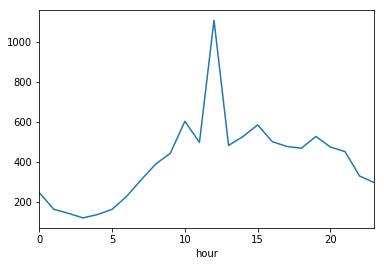

In [121]:
df.groupby("hour").latitud.count().plot()

(0, 24)

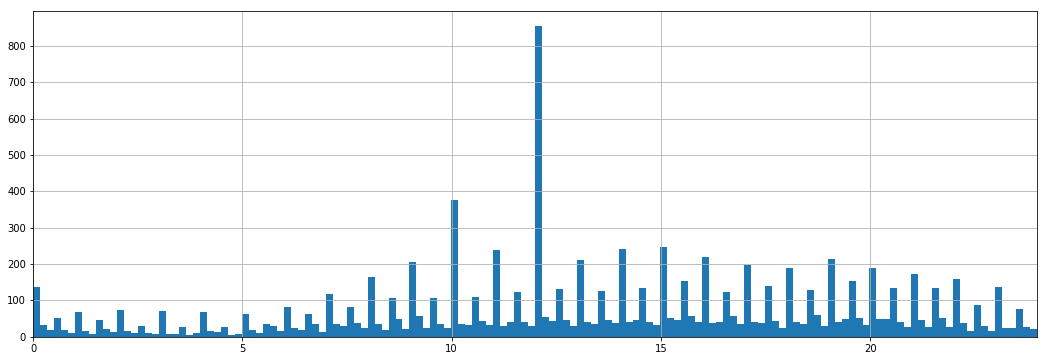

In [131]:
plt.figure(figsize=(18,6))
df.time.hist(bins=144)
plt.xlim(0, 24)

(0, 24)

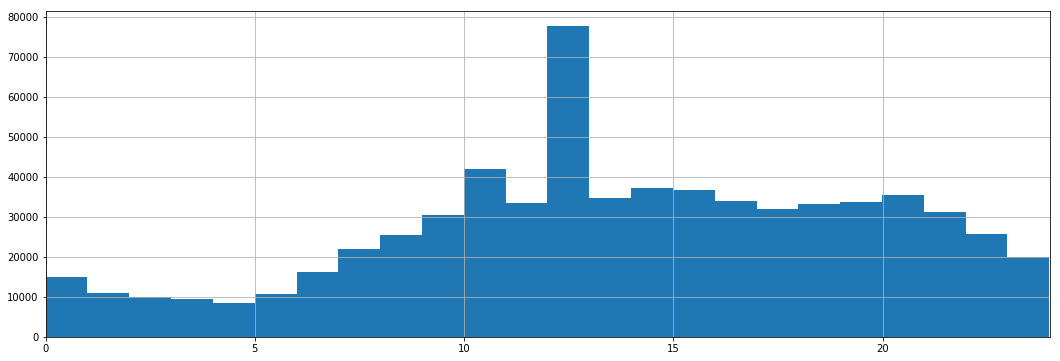

In [56]:
plt.figure(figsize=(18,6))
df.time.hist(bins=24)
plt.xlim(0, 24)

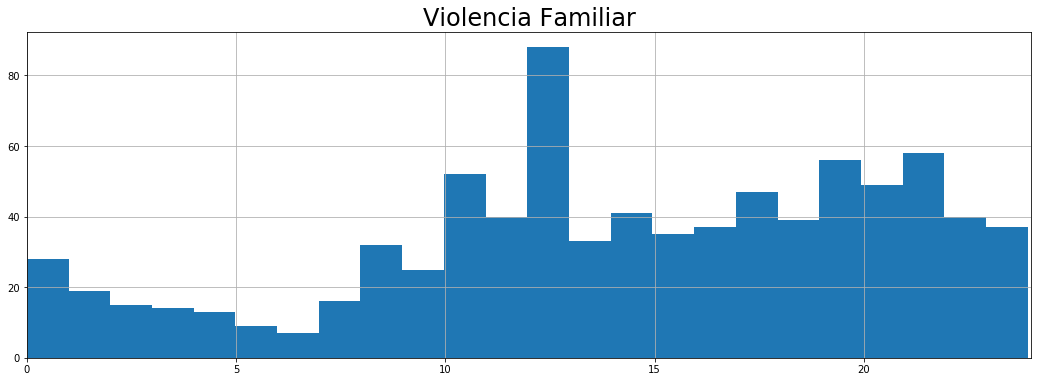

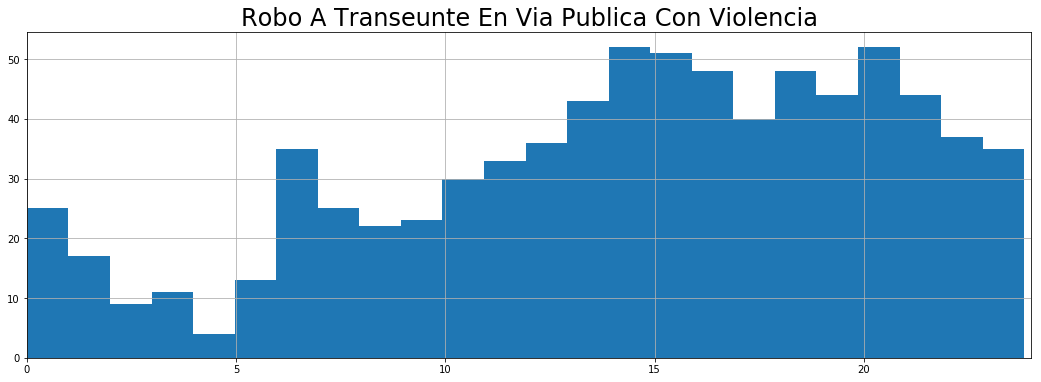

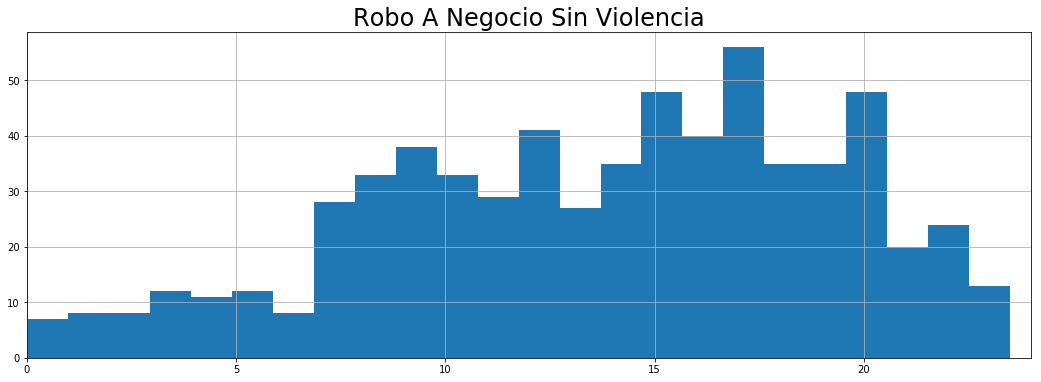

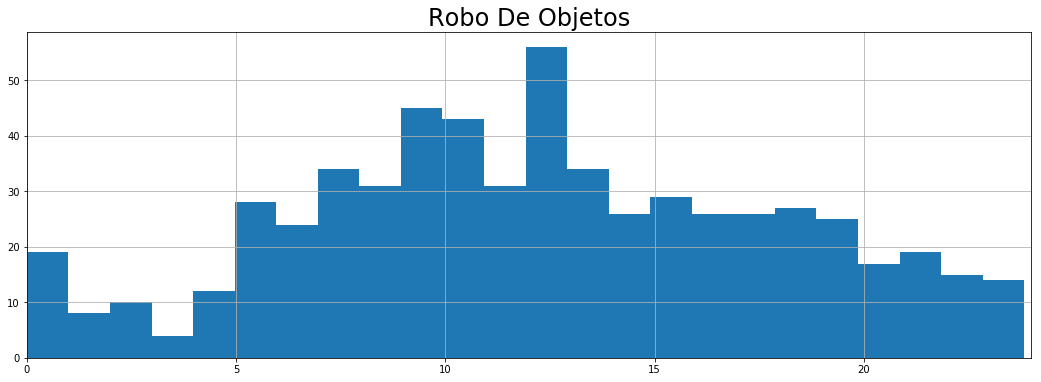

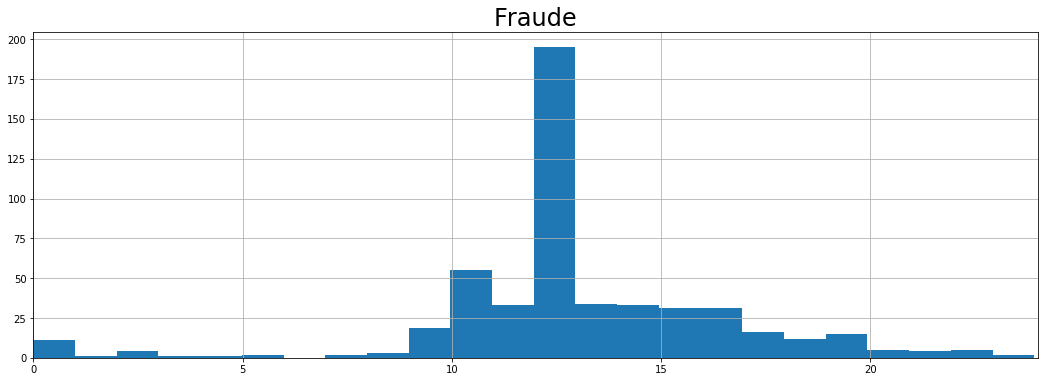

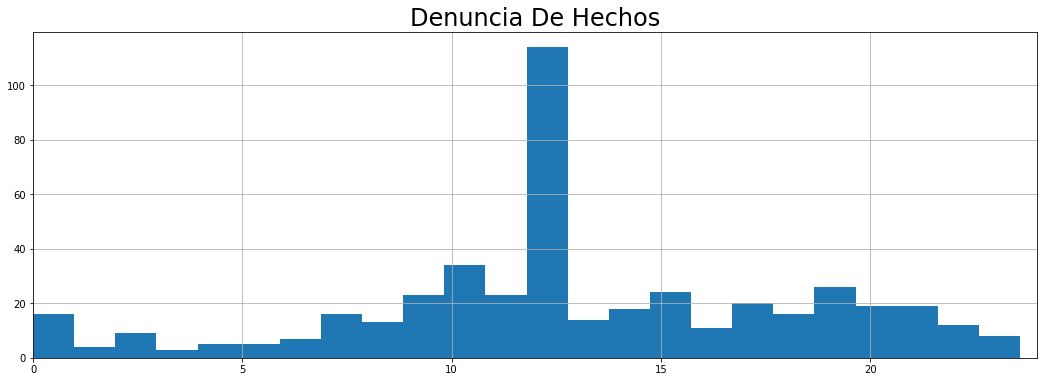

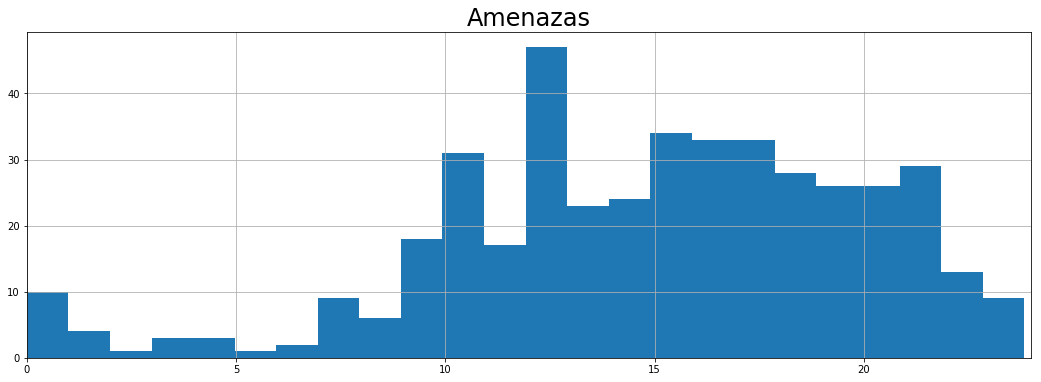

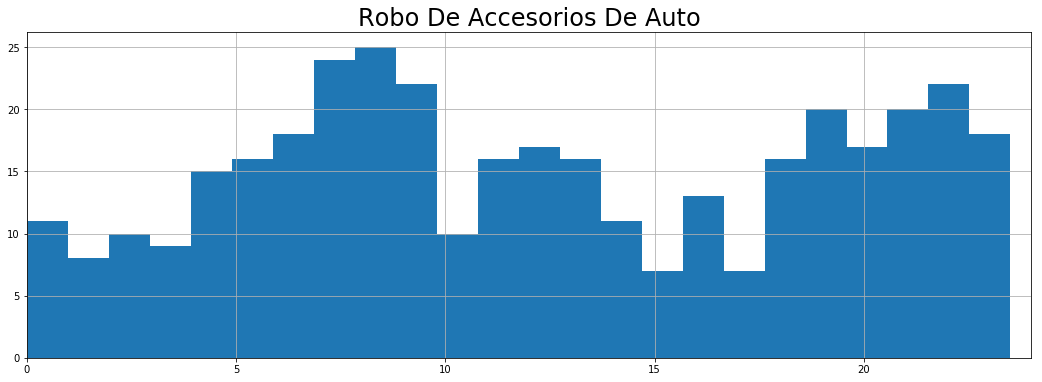

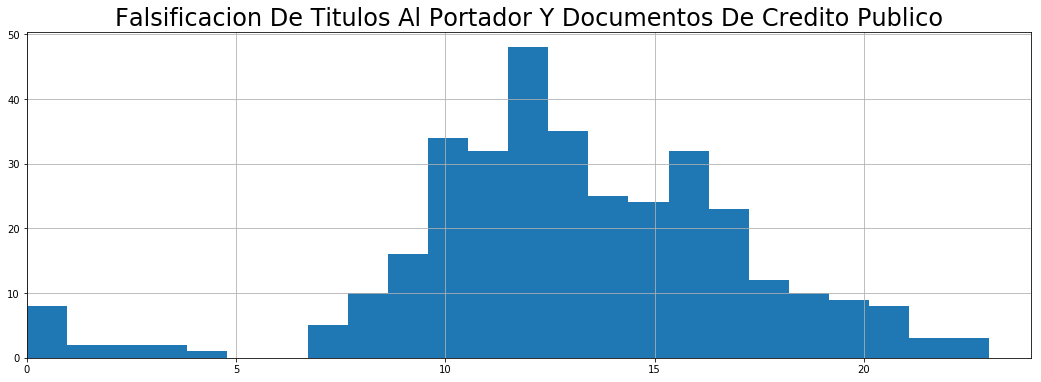

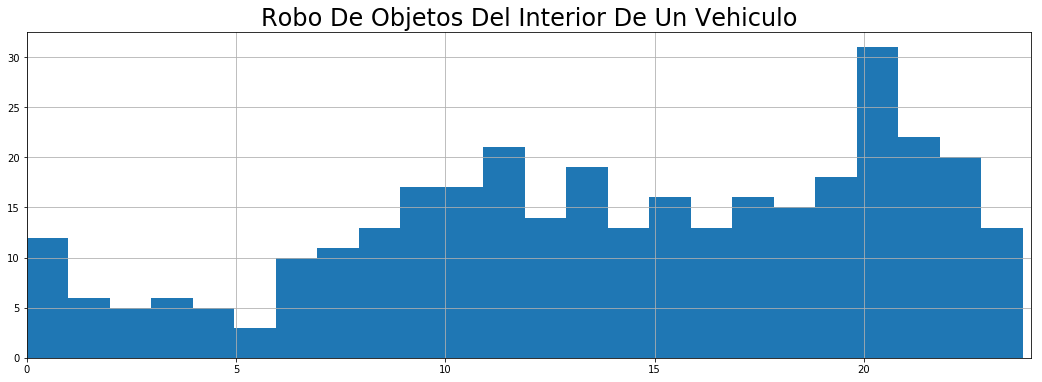

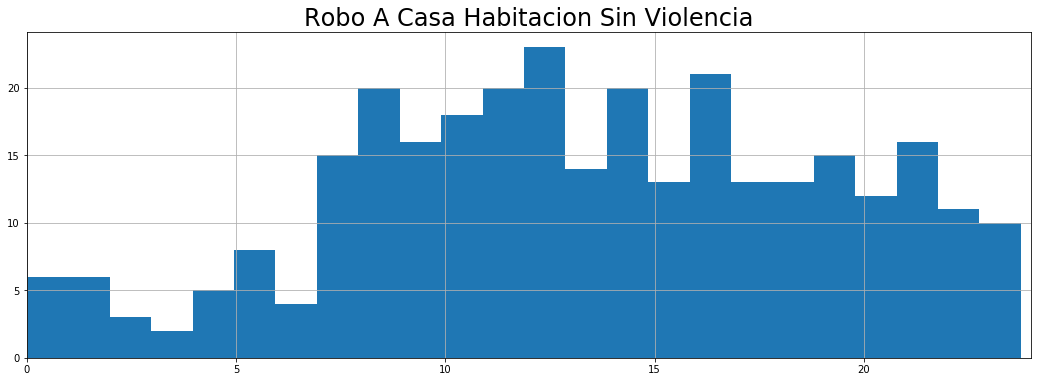

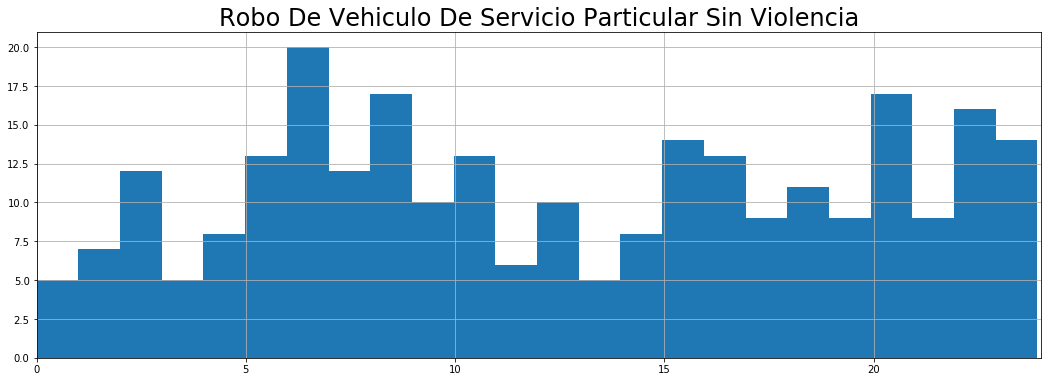

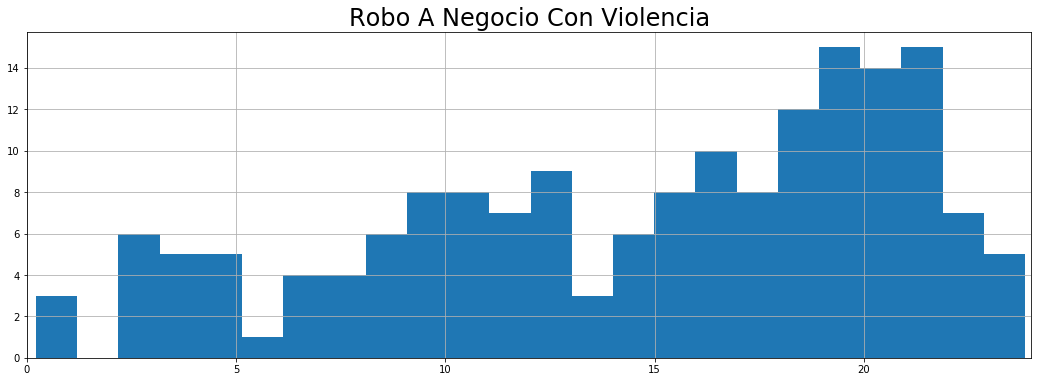

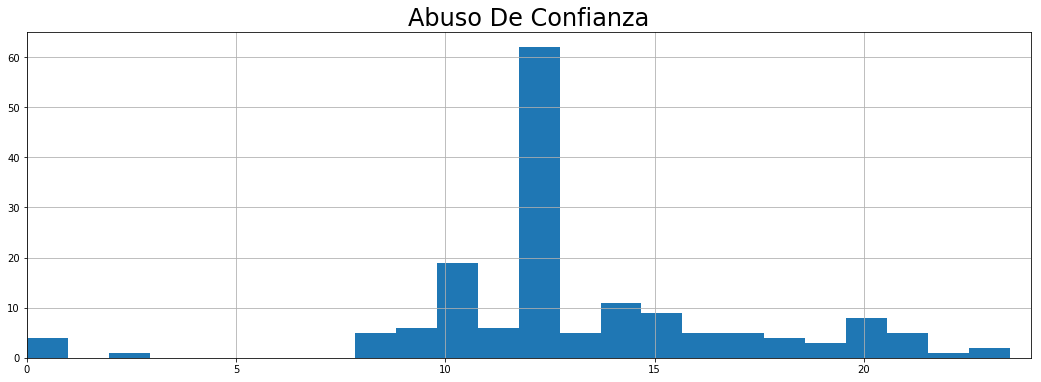

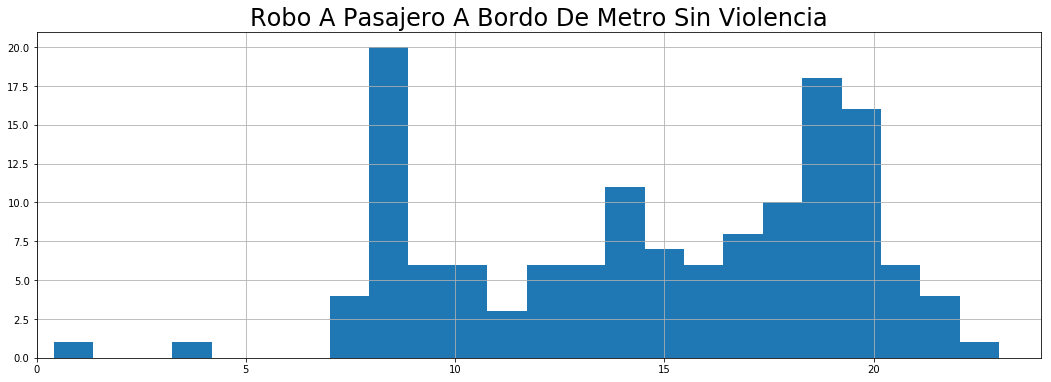

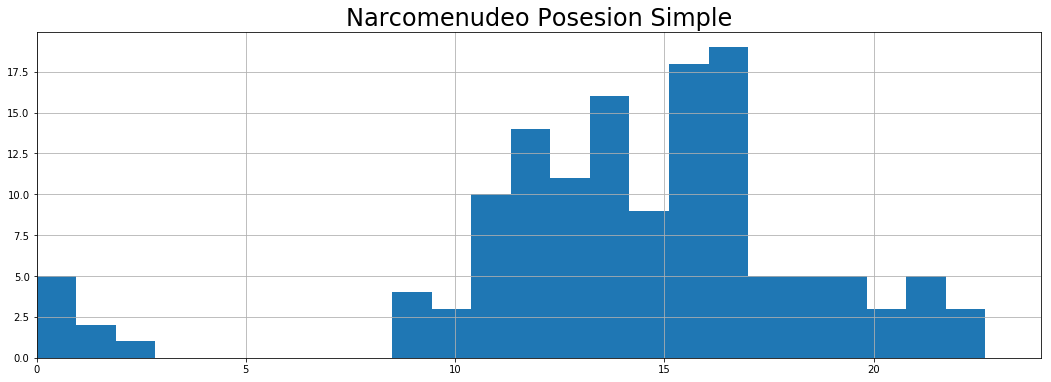

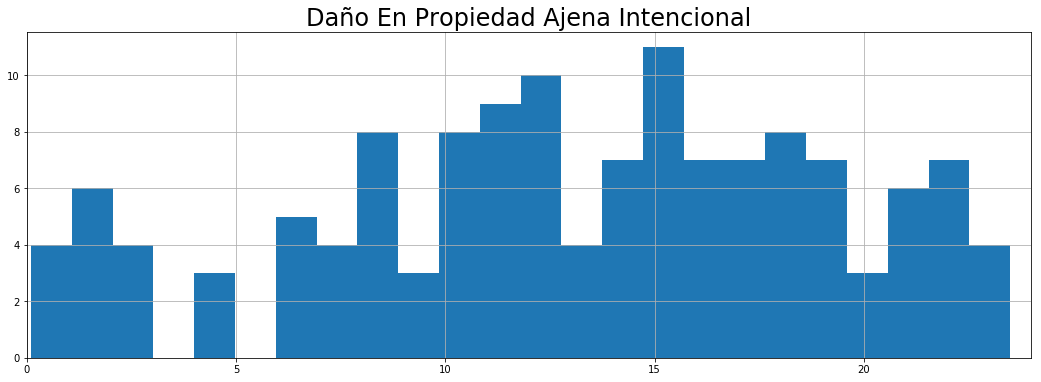

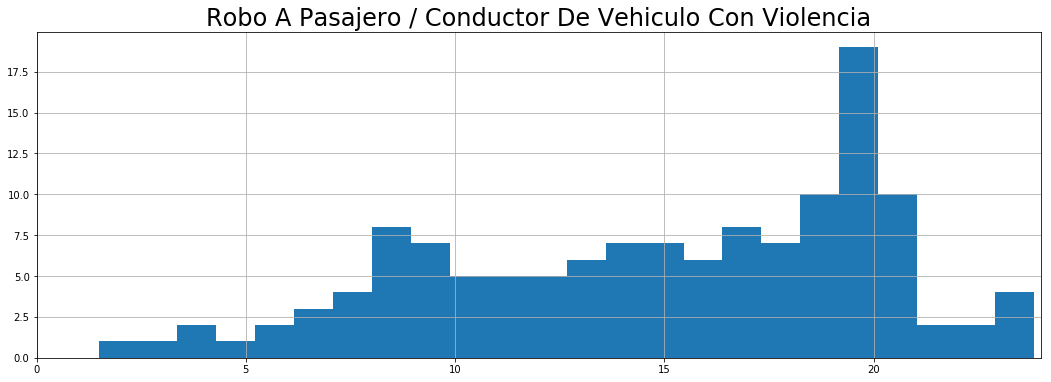

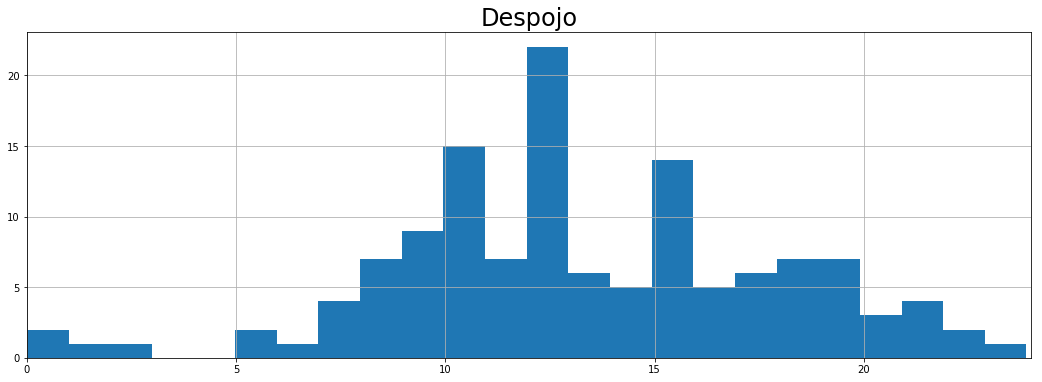

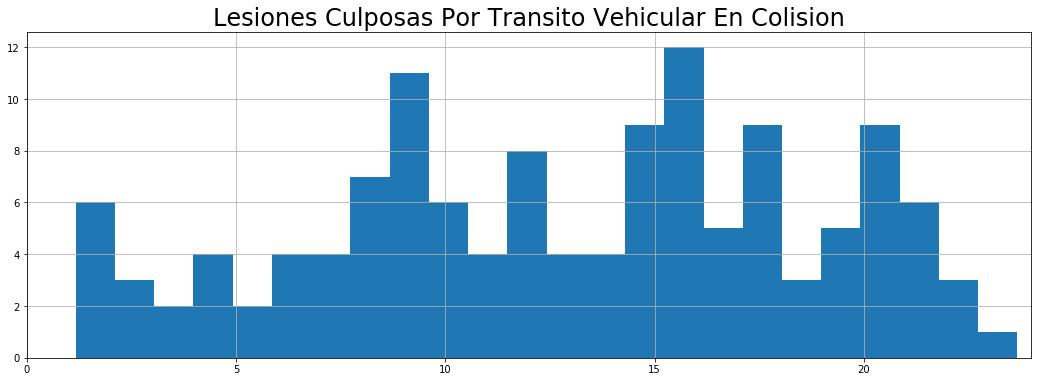

In [145]:
for crime in df.groupby("delito").delito.count().sort_values(ascending=False).head(20).index:
    plt.figure(figsize=(18,6))
    df.loc[df.delito==crime].time.hist(bins=24)
    plt.xlim(0, 24)
    plt.title(crime.title(), fontsize=24)
    plt.show()